In [31]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Unzips file and puts all the data into new folder
with zipfile.ZipFile("Takehome_Data_January_2023.zip", 'r') as zip_ref:
    zip_ref.extractall("fetch_take_home_data")

In [3]:
#reading all the files in
brands_df=pd.read_csv('fetch_take_home_data/brands.csv')
receipt_items_df=pd.read_csv('fetch_take_home_data/receipt_items.csv')
receipts_df=pd.read_csv('fetch_take_home_data/receipts.csv')
users_df=pd.read_csv('fetch_take_home_data/users.csv')

In [4]:
#Getting an understanding for the data
print(brands_df.shape)
brands_df.head(10)

(406, 9)


,ID,BARCODE,BRAND_CODE,CPG_ID,CATEGORY,CATEGORY_CODE,NAME,ROMANCE_TEXT,RELATED_BRAND_IDS
0,5a8c35dde4b0ccf165fac9e6,511111904175,PEPPERIDGE FARM,5a734034e4b0d58f376be874,Grocery,GROCERY,Pepperidge Farm,Pepperidge Farm has been making exceptional co...,NaN
1,6234af8f4e09b6067c237adb,511111212997,CHEX MIX,6233966e8942a67af4934aa1,Snacks,SNACKS,CHEX MIX,NaN,NaN
2,5332f7d3e4b03c9a25efd14e,511111803393,NaN,5332f5f2e4b03c9a25efd0aa,Snacks,SNACKS,Cheez-It,NaN,NaN
3,5d6412e9a3a018514994f426,511111304982,BETTER HOMES & GARDENS,53e10d6368abd3c7065097cc,Magazines,MAGAZINES,Better Homes & Gardens Magazine,Better Homes & Gardens offers beautiful photog...,5d6413156d5f3b23d1bc790a : 5d6417dda3a01851499...
4,621e777eacedc065cefa99a7,511111912859,TRUVIA,621e7754d759b10969cbcc08,Baking,BAKING,Truvia®,NaN,NaN
5,5887a051e4b02187f85cdad0,511111401209,BAKER'S,53e10d6368abd3c7065097cc,Baking,BAKING,Baker's,Baker's premium ingredients bring your baking ...,NaN
6,592486bee410d61fcea3d135,511111700746,PG TIPS,5332f5f6e4b03c9a25efd0b4,Beverages,BEVERAGES,PG Tips,"PG Tips strong, distinct blend comes from only...",5a021611e4b00efe02b02a57 : 5f19ccb52455c943622...
7,5887a0fde4b02187f85cdad1,511111801191,CAPRI SUN,53e10d6368abd3c7065097cc,Beverages,BEVERAGES,Capri Sun,"The go-to drink for real, active play. Explore...",NaN
8,5bd2011f90fa074576779a17,511111704652,HUGGIES,550b2565e4b001d5e9e4146f,Baby,BABY,Huggies,"The first moment you hug your baby, the rest o...",5c112616315a241ba1716511 : 5332f775e4b03c9a25e...
9,5332f6ede4b03c9a25efd0e5,511111603870,BLUE BUNNY,53e10d6368abd3c7065097cc,Frozen,FROZEN,Blue Bunny,NaN,NaN


In [5]:
print(receipt_items_df.shape)
receipt_items_df.head(10)

(360377, 12)


,REWARDS_RECEIPT_ID,ITEM_INDEX,REWARDS_RECEIPT_ITEM_ID,DESCRIPTION,BARCODE,BRAND_CODE,QUANTITY_PURCHASED,TOTAL_FINAL_PRICE,POINTS_EARNED,REWARDS_GROUP,ORIGINAL_RECEIPT_ITEM_TEXT,MODIFY_DATE
0,60bb28c10a720d557b128262,0,1efd6d7c75ecbae32214acb6cda41d12,RLGULAR SALE,NaN,NaN,1.0,9.99,NaN,NaN,RLGULAR SALE,2021-06-05T07:33:36.91Z
1,60bb28c10a720d557b128262,1,79482a8fa3bd0eef3d626f1c862042e8,82 GOURMET HOUSEW,000240292012,NaN,1.0,4.99,NaN,NaN,82 GOURMET HOUSEW,2021-06-05T07:33:36.91Z
2,627151230a724d730825106a,0,b26669cf4ce90cc9d7d3b0ab588cb04b,GOLDILOCKS NOPIA R BLAGK,NaN,NaN,1.0,4.75,NaN,NaN,GOLDILOCKS NOPIA R BLAGK,2022-05-03T15:58:41.769Z
3,627151230a724d730825106a,1,b4fafd04d8274a1e95b97155edaade2f,KURI-IRI DORAYAKI CAKE,NaN,NaN,1.0,5.99,NaN,NaN,KURI-IRI DORAYAKI CAKE,2022-05-03T15:58:41.769Z
4,627151230a724d730825106a,2,39694b0880b511e8a12bfb76cf2c20f3,YIZMANG FISH BALL,NaN,NaN,1.0,12.00,NaN,NaN,YIZMANG FISH BALL,2022-05-03T15:58:41.769Z
5,627151230a724d730825106a,3,dae5c45b30084518b430ec780aae3f6b,FVAAAAAL,NaN,NaN,NaN,8.71,NaN,NaN,FVAAAAAL,2022-05-03T15:58:41.769Z
6,62dc2eaf0a72218a100620d7,0,19d2aed63277759bc7c05670e5a40e49,KRO CHEESE,NaN,KROGER,1.0,1.67,NaN,NaN,KRO CHEESE,2022-07-23T17:24:32.649Z
7,62dc2eaf0a72218a100620d7,1,4221dcb5e6ddb0c15769cfaf59250dd5,SARGENTO NATURAL SHREDDED CHEESE 6OZ OR LARGER,311111444639,SARGENTO,1.0,3.50,35.0,SARGENTO NATURAL SHREDDED CHEESE 6OZ OR LARGER,SARGENTO CHEESE,2022-07-23T17:24:32.649Z
8,62dc2eaf0a72218a100620d7,2,c6b5a3e426dcb80d4a69ce5637769056,KRO SHRED CHEESE,NaN,KROGER,1.0,2.00,NaN,NaN,KRO SHRED CHEESE,2022-07-23T17:24:32.649Z
9,62dc2eaf0a72218a100620d7,3,581c9eab758a7de6666c256219970753,BOLTHOUSE FARMS,511111204084,BOLTHOUSE FARMS,1.0,3.50,NaN,NaN,BLTH DRESSING,2022-07-23T17:24:32.649Z


In [6]:
print(receipts_df.shape)
receipts_df.head(10)

(70601, 21)


,ID,STORE_NAME,PURCHASE_DATE,PURCHASE_TIME,DATE_SCANNED,TOTAL_SPENT,REWARDS_RECEIPT_STATUS,USER_ID,USER_VIEWED,PURCHASED_ITEM_COUNT,...,PENDING_DATE,MODIFY_DATE,FLAGGED_DATE,PROCESSED_DATE,FINISHED_DATE,REJECTED_DATE,NEEDS_FETCH_REVIEW,DIGITAL_RECEIPT,DELETED,NON_POINT_EARNING_RECEIPT
0,62868f660a72546bef0b2dd0,TOWN OF ROCKY MOUNT,2022-05-19T00:00:00Z,2:05 PM,2022-05-19T18:41:42.53Z,859.87,FINISHED,61375682c625197c5db73602,True,1.0,...,2022-05-19T18:57:57.228Z,2022-05-22T11:20:57.998Z,2022-05-19T18:42:57.042Z,NaN,2022-05-19T18:57:57.336Z,NaN,NaN,False,NaN,True
1,6096b7370a7216d316001149,NaN,NaN,NaN,2021-05-08T16:07:19.03Z,NaN,SUBMITTED,60047e8a2d7db612a69d2e18,True,NaN,...,NaN,2021-05-08T16:07:19.03Z,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2,6269a4ea0a7241077408b6e1,FAMILY DOLLAR,2022-04-27T00:00:00Z,4:15 PM,2022-04-27T20:17:46.09Z,11.00,FINISHED,61578e96c2fb9321213720fc,True,2.0,...,2022-04-27T20:17:54.214Z,2022-04-27T20:17:55.521Z,NaN,NaN,2022-04-27T20:17:54.394Z,NaN,NaN,False,NaN,False
3,625b25e70a723eb9730d2c9c,PUBLIX,2022-04-15T00:00:00Z,4:45 PM,2022-04-16T20:24:07.259Z,10.67,FINISHED,6048de2ec9106b12d2b1ff61,True,4.0,...,2022-04-16T20:24:23.399Z,2022-04-16T20:24:24.064Z,NaN,NaN,2022-04-16T20:24:23.598Z,NaN,NaN,False,NaN,False
4,60e3bd7e0a7215bd550fb8cc,COSTCO,2021-06-30T00:00:00Z,1:16 PM,2021-07-06T02:18:38.495Z,61.90,FINISHED,6048de2ec9106b12d2b1ff61,True,10.0,...,2021-07-06T02:18:49.55Z,2021-07-06T02:18:51.906Z,NaN,NaN,2021-07-06T02:18:50.283Z,NaN,NaN,False,NaN,False
5,61590ee50a720e1f601d15c0,MUSIC ON,2021-09-22T00:00:00Z,12:31 AM,2021-10-03T02:01:09.899Z,139.00,FINISHED,609ab37f7a2e8f2f95ae968f,True,3.0,...,2021-10-03T02:01:38.946Z,2021-10-03T02:01:39.622Z,NaN,NaN,2021-10-03T02:01:39.201Z,NaN,NaN,False,NaN,True
6,62734c000a725f5f63027013,SAM'S CLUB,2022-05-04T00:00:00Z,5:47 PM,2022-05-05T04:01:04.571Z,254.16,FINISHED,619aa15807acef7276e4f72c,True,21.0,...,2022-05-05T04:01:41.476Z,2022-05-05T04:01:42.13Z,NaN,NaN,2022-05-05T04:01:41.739Z,NaN,NaN,False,NaN,False
7,6222ab120a722171493f317b,WINN-DIXIE,2022-03-04T00:00:00Z,7:11 PM,2022-03-05T00:13:06.95Z,99.35,FINISHED,617460366e2684498143e769,True,33.0,...,2022-03-05T00:13:56.211Z,2022-03-05T00:14:56.65Z,NaN,NaN,2022-03-05T00:13:56.503Z,NaN,NaN,False,NaN,False
8,61587c350a720e82f21b3c8a,NATURAL FOOD CENTER,2021-09-17T00:00:00Z,12:17 AM,2021-10-02T15:35:17.903Z,7.18,FINISHED,6056acf9379c7462d16f9fec,True,44.0,...,2021-10-02T15:36:11.864Z,2021-10-02T15:36:23.015Z,NaN,NaN,2021-10-02T15:36:12.826Z,NaN,NaN,False,NaN,True
9,62ff01df0a725d25370189d4,COSTCO,2022-08-18T00:00:00Z,8:04 PM,2022-08-19T03:22:07.198Z,23.49,FINISHED,609ab37f7a2e8f2f95ae968f,True,1.0,...,2022-08-19T03:22:19.499Z,2022-08-19T03:22:22.043Z,NaN,NaN,2022-08-19T03:22:19.674Z,NaN,NaN,False,NaN,False


In [15]:
print(users_df.shape)
users_df.head(10)

(164, 8)


,CREATED_DATE,BIRTH_DATE,GENDER,LAST_REWARDS_LOGIN,STATE,SIGN_UP_PLATFORM,SIGN_UP_SOURCE,ID
0,2021-12-20T00:29:17.118Z,1984-03-20T00:00:00Z,transgender,2023-01-04T16:32:15Z,FL,NaN,Apple,61bfce5d6655417f803b6538
1,2021-10-21T17:15:25.825Z,1987-08-08T05:00:00Z,prefer_not_to_say,2023-01-04T16:04:33Z,PA,unknown,Google,6171a02d8034995a3d858fb3
2,2021-10-23T19:19:18.305Z,1995-06-18T05:00:00Z,male,2023-01-04T16:13:13Z,FL,NaN,Apple,617460366e2684498143e769
3,2021-03-30T02:35:41.249Z,1999-08-23T07:00:00Z,transgender,2023-01-04T16:09:51Z,MI,ios,Google,60628e7d85cdff011de41113
4,2021-04-26T23:15:54.375Z,1992-10-28T16:16:23Z,male,2023-01-04T16:24:18Z,CA,andrioid,Email,608749aac63a95130a45fbf4
5,2021-09-14T15:19:23Z,1985-04-30T05:00:00Z,female,2023-01-04T16:25:50Z,OH,andrioid,Facebook,6140bd7bcb59cb0558ddd43e
6,2021-08-17T21:13:28.85Z,1964-05-13T04:00:00Z,prefer_not_to_say,2023-01-04T16:06:19Z,NY,ios,Apple,611c26782cacc93cd0230faa
7,2021-01-15T18:15:15.895Z,2003-08-07T04:00:00Z,female,2023-01-04T16:28:19Z,OH,ios,Facebook,6001dbb3878e221317c8a065
8,2021-11-21T19:43:20.717Z,1962-10-08T05:00:00Z,prefer_not_to_say,2023-01-04T16:24:04Z,MI,andrioid,Email,619aa15807acef7276e4f72c
9,2021-02-05T15:17:25.9Z,1953-05-23T05:00:00Z,prefer_not_to_say,2023-01-04T16:31:04Z,OH,NaN,Facebook,601d61856788c012f7a1b276


In [8]:
receipts_df_modified=receipts_df[receipts_df['PURCHASE_DATE'].notna()]#dropping rows that don't have an entry for purchase date
receipts_df_modified['PURCHASE_DATE']=pd.to_datetime(receipts_df_modified['PURCHASE_DATE'].str[:7]) #slice to get just year and 
#month and turn it into a date object
receipts_df_modified

<ipython-input-8-0609e4590507>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  receipts_df_modified['PURCHASE_DATE']=pd.to_datetime(receipts_df_modified['PURCHASE_DATE'].str[:7])


,ID,STORE_NAME,PURCHASE_DATE,PURCHASE_TIME,DATE_SCANNED,TOTAL_SPENT,REWARDS_RECEIPT_STATUS,USER_ID,USER_VIEWED,PURCHASED_ITEM_COUNT,...,PENDING_DATE,MODIFY_DATE,FLAGGED_DATE,PROCESSED_DATE,FINISHED_DATE,REJECTED_DATE,NEEDS_FETCH_REVIEW,DIGITAL_RECEIPT,DELETED,NON_POINT_EARNING_RECEIPT
0,62868f660a72546bef0b2dd0,TOWN OF ROCKY MOUNT,2022-05-01,2:05 PM,2022-05-19T18:41:42.53Z,859.87,FINISHED,61375682c625197c5db73602,True,1.0,...,2022-05-19T18:57:57.228Z,2022-05-22T11:20:57.998Z,2022-05-19T18:42:57.042Z,NaN,2022-05-19T18:57:57.336Z,NaN,NaN,False,NaN,True
2,6269a4ea0a7241077408b6e1,FAMILY DOLLAR,2022-04-01,4:15 PM,2022-04-27T20:17:46.09Z,11.00,FINISHED,61578e96c2fb9321213720fc,True,2.0,...,2022-04-27T20:17:54.214Z,2022-04-27T20:17:55.521Z,NaN,NaN,2022-04-27T20:17:54.394Z,NaN,NaN,False,NaN,False
3,625b25e70a723eb9730d2c9c,PUBLIX,2022-04-01,4:45 PM,2022-04-16T20:24:07.259Z,10.67,FINISHED,6048de2ec9106b12d2b1ff61,True,4.0,...,2022-04-16T20:24:23.399Z,2022-04-16T20:24:24.064Z,NaN,NaN,2022-04-16T20:24:23.598Z,NaN,NaN,False,NaN,False
4,60e3bd7e0a7215bd550fb8cc,COSTCO,2021-06-01,1:16 PM,2021-07-06T02:18:38.495Z,61.90,FINISHED,6048de2ec9106b12d2b1ff61,True,10.0,...,2021-07-06T02:18:49.55Z,2021-07-06T02:18:51.906Z,NaN,NaN,2021-07-06T02:18:50.283Z,NaN,NaN,False,NaN,False
5,61590ee50a720e1f601d15c0,MUSIC ON,2021-09-01,12:31 AM,2021-10-03T02:01:09.899Z,139.00,FINISHED,609ab37f7a2e8f2f95ae968f,True,3.0,...,2021-10-03T02:01:38.946Z,2021-10-03T02:01:39.622Z,NaN,NaN,2021-10-03T02:01:39.201Z,NaN,NaN,False,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70596,6069d61e0a720c916001aef5,DICK'S SPORTING GOODS,2021-04-01,10:37 AM,2021-04-04T15:07:10.907Z,29.98,FINISHED,60628e7d85cdff011de41113,True,2.0,...,2021-04-04T15:07:28.278Z,2021-04-04T15:07:29.383Z,NaN,NaN,2021-04-04T15:07:28.49Z,NaN,NaN,False,NaN,True
70597,60c7ace80a721781bd002b8e,COSTCO,2021-06-01,1:04 PM,2021-06-14T19:24:24.815Z,59.72,FINISHED,60b7b2011d501f6c02387b62,True,8.0,...,2021-06-14T19:24:41.199Z,2021-06-14T19:24:43.895Z,NaN,NaN,2021-06-14T19:24:41.525Z,NaN,NaN,False,NaN,False
70598,6371927d0a725ea48b84621c,WALMART,2022-11-01,8:43 PM,2022-11-14T00:57:33.08Z,258.81,FINISHED,6134c726bb1615636197f943,True,23.0,...,2022-11-14T00:58:05.375Z,2022-11-14T00:58:07.961Z,NaN,NaN,2022-11-14T00:58:05.723Z,NaN,NaN,False,NaN,False
70599,61b60d450a723af31e49e390,KOSTA'S GYROS,2021-12-01,12:38 AM,2021-12-12T14:55:01.235Z,24.86,FINISHED,607977220eb8310a043a61db,True,4.0,...,2021-12-12T14:55:23.799Z,2021-12-12T14:55:24.387Z,NaN,NaN,2021-12-12T14:55:23.941Z,NaN,NaN,False,NaN,True


In [9]:
receipts_df_modified=receipts_df_modified[receipts_df_modified['PURCHASE_DATE'].dt.year==2022]#get rows where the purchase data 
#was 2022

In [29]:
monthly_counts=receipts_df_modified.groupby(['PURCHASE_DATE']).size().reset_index() #dataframe with the amount of receipts 
#entered for each month 
monthly_counts=monthly_counts.rename(columns={0: 'RECEIPTS_ENTERED'}) #naming column with the count for each month
monthly_counts

,PURCHASE_DATE,receipts_entered
0,2022-01-01,3165
1,2022-02-01,3129
2,2022-03-01,3850
3,2022-04-01,3516
4,2022-05-01,3545
5,2022-06-01,3410
6,2022-07-01,3828
7,2022-08-01,3679
8,2022-09-01,3609
9,2022-10-01,3710


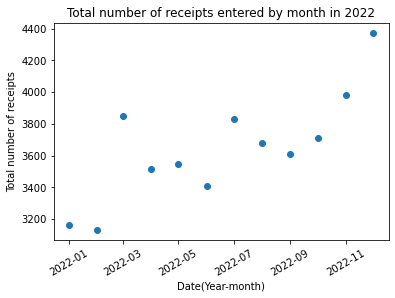

In [30]:
plt.scatter(monthly_counts['PURCHASE_DATE'], monthly_counts['receipts_entered'])
plt.xlabel('Date(Year-month)')
plt.ylabel('Total number of receipts')
plt.xticks(rotation=30)
plt.title('Total number of receipts entered by month in 2022')
plt.show()

In [ ]:
In general, the amount of receipts entered each month seems to be trending upwards

In [12]:
spent_items_summed=receipts_df_modified.groupby(['PURCHASE_DATE'])['TOTAL_SPENT', 'PURCHASED_ITEM_COUNT'].sum().reset_index()
spent_items_summed #dataframe with the total dollars spent and item count for each month in 2022

<ipython-input-12-8ee104107ce0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  spent_items_summed=receipts_df_modified.groupby(['PURCHASE_DATE'])['TOTAL_SPENT', 'PURCHASED_ITEM_COUNT'].sum().reset_index()


,PURCHASE_DATE,TOTAL_SPENT,PURCHASED_ITEM_COUNT
0,2022-01-01,163792.43,57036.0
1,2022-02-01,122898.07,19586.0
2,2022-03-01,147393.30,23746.0
3,2022-04-01,128370.64,30702.0
4,2022-05-01,136011.80,20922.0
5,2022-06-01,156282.49,19342.0
6,2022-07-01,304320.77,24353.0
7,2022-08-01,153119.77,21124.0
8,2022-09-01,135029.67,63216.0
9,2022-10-01,145985.56,22223.0


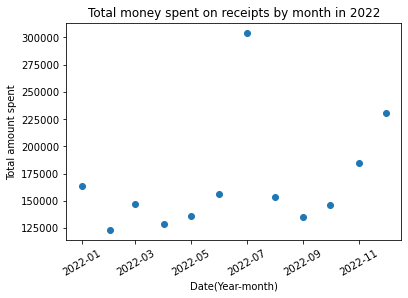

In [16]:
plt.scatter(spent_items_summed['PURCHASE_DATE'], spent_items_summed['TOTAL_SPENT'])
plt.xlabel('Date(Year-month)')
plt.ylabel('Total amount spent')
plt.xticks(rotation=30)
plt.title('Total money spent on receipts by month in 2022')
plt.show()

Seems like the amount spent starts to trend upwards the last few months of the year, but probably need to wait and get more data to have a better idea if it will continue

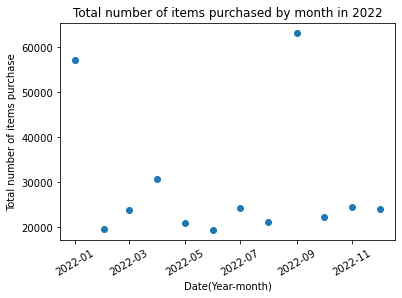

In [17]:
plt.scatter(spent_items_summed['PURCHASE_DATE'], spent_items_summed['PURCHASED_ITEM_COUNT']) 
plt.xlabel('Date(Year-month)')
plt.ylabel('Total number of items purchase')
plt.xticks(rotation=30)
plt.title('Total number of items purchased by month in 2022')
plt.show()

 This plot does not seem to be showing any trend

In [43]:
months_array = monthly_counts['PURCHASE_DATE'].dt.month.to_numpy().reshape(-1, 1) #turning months in 2022 and receipts entered 
#into numpy arrays to be used in a linear regression model
receipts_entered_array = monthly_counts['receipts_entered'].to_numpy()

# create a LinearRegression object and fit model for the amount of receipts entered based on month
receipts_reg = LinearRegression()
receipts_reg.fit(months_array, receipts_entered_array)

print(receipts_reg.coef_[0], receipts_reg.score(months_array, receipts_entered_array))

74.40909090909088 0.606494746796125


The linear regression model suggests that each month the amount of receipts entered will increase by about 74 a month, which could be used to predict future months in 2023. However, it only has a score of 0.60, which is not super strong, so it may be good to be skeptical in terms of using it to predict future months, at least based on this model alone. 